In [1]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd   
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
from matplotlib import pyplot

In [2]:
# Importing the dataset  
dataset = pd.read_csv('data.csv')   
dataset.drop(dataset.index[dataset['game'] == 'Alternating'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Sustained'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Focused'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Divided'], inplace = True)
display(dataset)

,id,child_gender,child_age,total_correct_responses,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,diagnosis,percentage_no_of_correct_responses,oer,cer,game
160,161,1,4,8,8,0,0,0,3459,No,100.000000,0.000000,0.0,Selective
161,162,2,4,6,6,0,0,0,3000,No,100.000000,0.000000,0.0,Selective
162,163,2,4,6,6,0,0,0,10888,No,100.000000,0.000000,0.0,Selective
163,164,2,4,6,6,0,0,0,7081,No,100.000000,0.000000,0.0,Selective
164,165,2,4,7,6,0,1,0,9953,No,85.714286,14.285714,0.0,Selective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,320,1,7,8,8,0,0,0,12332,No,100.000000,0.000000,0.0,Selective
320,321,1,7,6,0,3,6,0,8190,No,0.000000,100.000000,50.0,Selective
321,322,1,7,7,5,0,2,0,6749,No,71.428571,28.571429,0.0,Selective
322,323,1,7,7,7,0,0,0,7795,No,100.000000,0.000000,0.0,Selective


In [3]:
# extracting only 11-comission & 12-omission
x = dataset.iloc[:, [8, 10, 11, 12]].values  
display(x)

array([[3.45900000e+03, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+03, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [1.08880000e+04, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [7.08100000e+03, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [9.95300000e+03, 8.57142857e+01, 1.42857143e+01, 0.00000000e+00],
       [1.42070000e+04, 1.00000000e+02, 0.00000000e+00, 2.22222222e+01],
       [1.40360000e+04, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [1.26460000e+04, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [7.25100000e+03, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [1.00260000e+04, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [1.14820000e+04, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [1.20860000e+04, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [1.08160000e+04, 1.00000000e+02, 0.00000000e+00, 0.00000000e+00],
       [6.34500000e+03, 1.00000000e+02, 0.00000000e

In [4]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = scaler.fit_transform(x)

# statistics of scaled data
pd.DataFrame(new_df).describe()

display(new_df)


array([[-1.42198814e+00,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-1.49278251e+00,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-2.76168192e-01,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-8.63345004e-01,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-4.20378940e-01, -4.17936084e-01,  4.17936084e-01,
        -3.16765400e-01],
       [ 2.35741406e-01,  3.68015386e-01, -3.68015386e-01,
         1.42682072e+00],
       [ 2.09367034e-01,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-5.02113725e-03,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-8.37124867e-01,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-4.09119705e-01,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-1.84551951e-01,  3.68015386e-01, -3.68015386e-01,
        -3.16765400e-01],
       [-9.13933502e-02,  3.68015386e-01, -3.68015386e-01,
      

In [5]:
x = dataset.iloc[:, [2, 8, 10, 11, 12]].copy()
x[['total_duration', 'percentage_no_of_correct_responses', 'oer', 'cer']] = new_df
x.head()
x = x.to_numpy()
display(x)


array([[ 4.00000000e+00, -1.42198814e+00,  3.68015386e-01,
        -3.68015386e-01, -3.16765400e-01],
       [ 4.00000000e+00, -1.49278251e+00,  3.68015386e-01,
        -3.68015386e-01, -3.16765400e-01],
       [ 4.00000000e+00, -2.76168192e-01,  3.68015386e-01,
        -3.68015386e-01, -3.16765400e-01],
       [ 4.00000000e+00, -8.63345004e-01,  3.68015386e-01,
        -3.68015386e-01, -3.16765400e-01],
       [ 4.00000000e+00, -4.20378940e-01, -4.17936084e-01,
         4.17936084e-01, -3.16765400e-01],
       [ 4.00000000e+00,  2.35741406e-01,  3.68015386e-01,
        -3.68015386e-01,  1.42682072e+00],
       [ 4.00000000e+00,  2.09367034e-01,  3.68015386e-01,
        -3.68015386e-01, -3.16765400e-01],
       [ 4.00000000e+00, -5.02113725e-03,  3.68015386e-01,
        -3.68015386e-01, -3.16765400e-01],
       [ 4.00000000e+00, -8.37124867e-01,  3.68015386e-01,
        -3.68015386e-01, -3.16765400e-01],
       [ 4.00000000e+00, -4.09119705e-01,  3.68015386e-01,
        -3.68015386e-01

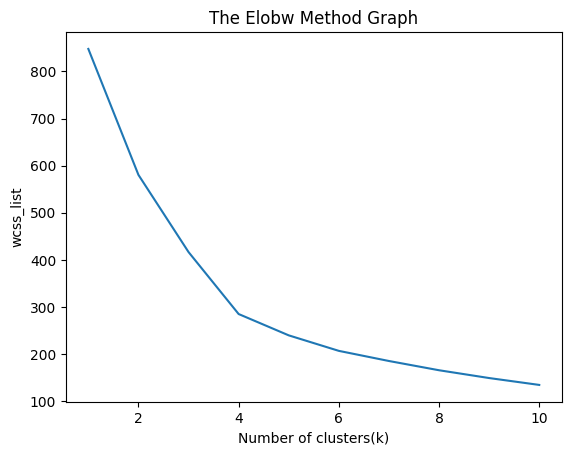

In [6]:
# Finding the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

In [7]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
print(y_predict)

'''
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster    
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of children')  
mtp.xlabel('Commission Errors')  
mtp.ylabel('Omission Errors')  
mtp.legend()  
mtp.show()  
'''

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 3 2 1 1 1 1 1 1 1 3 1 1 2 1 1
 1 1 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 1 3 2 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 3 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0]


"\n#visulaizing the clusters  \nmtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  \nmtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  \nmtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster    \nmtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   \nmtp.title('Clusters of children')  \nmtp.xlabel('Commission Errors')  \nmtp.ylabel('Omission Errors')  \nmtp.legend()  \nmtp.show()  \n"

In [9]:
import pickle
# save the model to disk
filename = 'selectivemodel.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [10]:
new_df = dataset.iloc[:, [2, 8, 10, 11, 12]].copy()
new_df['clusters'] = y_predict
new_df.head()
display(new_df)

,child_age,total_duration,percentage_no_of_correct_responses,oer,cer,clusters
160,4,3459,100.000000,0.000000,0.0,1
161,4,3000,100.000000,0.000000,0.0,1
162,4,10888,100.000000,0.000000,0.0,1
163,4,7081,100.000000,0.000000,0.0,1
164,4,9953,85.714286,14.285714,0.0,1
...,...,...,...,...,...,...
319,7,12332,100.000000,0.000000,0.0,0
320,7,8190,0.000000,100.000000,50.0,2
321,7,6749,71.428571,28.571429,0.0,0
322,7,7795,100.000000,0.000000,0.0,0


# Cluster Analysis

## Cluster 1

In [11]:
len(new_df[new_df["clusters"] == 0])

49

In [12]:
cluster_0 = new_df[new_df["clusters"] == 0 ]
display(cluster_0)
# cluster_0.boxplot(column =['CER'], grid = False)
# cluster_0.boxplot(column =['OER'], grid = False)

,child_age,total_duration,percentage_no_of_correct_responses,oer,cer,clusters
269,6,6202,66.666667,33.333333,33.333333,0
270,6,4780,100.000000,0.000000,14.285714,0
272,6,7026,66.666667,33.333333,0.000000,0
273,6,11709,87.500000,12.500000,0.000000,0
274,6,10688,100.000000,0.000000,0.000000,0
275,6,14634,100.000000,0.000000,0.000000,0
276,6,13861,100.000000,0.000000,12.500000,0
277,6,12183,100.000000,0.000000,0.000000,0
278,6,15429,100.000000,0.000000,0.000000,0
279,6,9037,100.000000,0.000000,0.000000,0


In [13]:
cluster_0 = new_df[new_df["clusters"] == 0 ]

maxVal = cluster_0['total_duration'].max()
minVal = cluster_0['total_duration'].min()

print("total_duration min - ", minVal)
print("total_duration max - ", maxVal)
print()

maxVal = cluster_0['percentage_no_of_correct_responses'].max()
minVal = cluster_0['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_0['oer'].max()
minVal = cluster_0['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)
print()

maxVal = cluster_0['cer'].max()
minVal = cluster_0['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

total_duration min -  4780
total_duration max -  20177

percentage_no_of_correct_responses min -  66.66666667
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  33.33333333

cer min -  0.0
cer max -  33.33333333


## Cluster 2

In [14]:
len(new_df[new_df["clusters"] == 1])

98

In [15]:
cluster_1 = new_df[new_df["clusters"] == 1 ]
display(cluster_1)
#cluster_1.boxplot(column =['CER'], grid = False)
#cluster_1.boxplot(column =['OER'], grid = False)

,child_age,total_duration,percentage_no_of_correct_responses,oer,cer,clusters
160,4,3459,100.000000,0.000000,0.000000,1
161,4,3000,100.000000,0.000000,0.000000,1
162,4,10888,100.000000,0.000000,0.000000,1
163,4,7081,100.000000,0.000000,0.000000,1
164,4,9953,85.714286,14.285714,0.000000,1
...,...,...,...,...,...,...
261,5,9059,100.000000,0.000000,0.000000,1
262,5,10000,100.000000,0.000000,0.000000,1
263,5,12889,100.000000,0.000000,0.000000,1
264,5,25719,100.000000,0.000000,0.000000,1


In [16]:
cluster_1 = new_df[new_df["clusters"] == 1 ]

maxVal = cluster_1['total_duration'].max()
minVal = cluster_1['total_duration'].min()

print("total_duration min - ", minVal)
print("total_duration max - ", maxVal)
print()

maxVal = cluster_1['percentage_no_of_correct_responses'].max()
minVal = cluster_1['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_1['oer'].max()
minVal = cluster_1['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)
print()

maxVal = cluster_1['cer'].max()
minVal = cluster_1['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

total_duration min -  3000
total_duration max -  25719

percentage_no_of_correct_responses min -  66.66666667
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  33.33333333

cer min -  0.0
cer max -  22.22222222


## Cluster 3

In [17]:
len(new_df[new_df["clusters"] == 2])

9

In [18]:
cluster_2 = new_df[new_df["clusters"] == 2 ]
display(cluster_2)
#cluster_2.boxplot(column =['CER'], grid = False)
#cluster_2.boxplot(column =['OER'], grid = False)

,child_age,total_duration,percentage_no_of_correct_responses,oer,cer,clusters
177,4,10348,12.500000,87.500000,0.000000,2
183,4,11724,33.333333,66.666667,0.000000,2
194,4,6276,16.666667,83.333333,0.000000,2
257,5,5112,33.333333,66.666667,0.000000,2
268,5,10381,50.000000,50.000000,0.000000,2
271,6,19055,50.000000,50.000000,0.000000,2
293,6,8370,16.666667,83.333333,16.666667,2
317,7,14406,16.666667,83.333333,0.000000,2
320,7,8190,0.000000,100.000000,50.000000,2


In [19]:
cluster_2 = new_df[new_df["clusters"] == 2 ]

maxVal = cluster_2['total_duration'].max()
minVal = cluster_2['total_duration'].min()

print("total_duration min - ", minVal)
print("total_duration max - ", maxVal)
print()

maxVal = cluster_2['percentage_no_of_correct_responses'].max()
minVal = cluster_2['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_2['oer'].max()
minVal = cluster_2['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)
print()

maxVal = cluster_2['cer'].max()
minVal = cluster_2['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

total_duration min -  5112
total_duration max -  19055

percentage_no_of_correct_responses min -  0.0
percentage_no_of_correct_responses max -  50.0

oer min -  50.0
oer max -  100.0

cer min -  0.0
cer max -  50.0


## Cluster 3

In [20]:
len(new_df[new_df["clusters"] == 3])

8

In [21]:
cluster_3 = new_df[new_df["clusters"] == 3 ]
display(cluster_3)
#cluster_2.boxplot(column =['CER'], grid = False)
#cluster_2.boxplot(column =['OER'], grid = False)

,child_age,total_duration,percentage_no_of_correct_responses,oer,cer,clusters
182,4,22296,100.000000,0.000000,33.333333,3
191,4,17495,100.000000,0.000000,71.428571,3
205,4,30387,100.000000,0.000000,16.666667,3
210,4,22375,100.000000,0.000000,66.666667,3
265,5,50461,100.000000,0.000000,0.000000,3
267,5,42199,100.000000,0.000000,83.333333,3
295,7,23689,83.333333,16.666667,33.333333,3
300,7,47829,100.000000,0.000000,57.142857,3


In [22]:
cluster_3 = new_df[new_df["clusters"] == 3 ]

maxVal = cluster_3['total_duration'].max()
minVal = cluster_3['total_duration'].min()

print("total_duration min - ", minVal)
print("total_duration max - ", maxVal)
print()

maxVal = cluster_3['percentage_no_of_correct_responses'].max()
minVal = cluster_3['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_3['oer'].max()
minVal = cluster_3['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)
print()

maxVal = cluster_3['cer'].max()
minVal = cluster_3['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

total_duration min -  17495
total_duration max -  50461

percentage_no_of_correct_responses min -  83.33333333
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  16.66666667

cer min -  0.0
cer max -  83.33333333


In [23]:
from matplotlib import pyplot as plt

# Pandas dataframe
data = pd.DataFrame({"Cluster1": cluster_0['CER'], "Cluster2": cluster_1['CER'], "Cluster3": cluster_2['CER']})

# Plot the dataframe
ax = data[['Cluster1', 'Cluster2', 'Cluster3']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

KeyError: 'CER'

In [ ]:
from matplotlib import pyplot as plt

# Pandas dataframe
data = pd.DataFrame({"Cluster1": cluster_0['OER'], "Cluster2": cluster_1['OER'], "Cluster3": cluster_2['OER']})

# Plot the dataframe
ax = data[['Cluster1', 'Cluster2', 'Cluster3']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()